### File 1
    *Which bird is the most dangerous 1990-2014?
    *Which month of the year has most animal strikes 1990-2014?
    *Which state has the most animal strikes 1990-2015?
    *Which airport has the most animal strikes 1990-2015?

In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
file_path = 'Data/database.csv'
df = pd.read_csv(file_path, low_memory=False)  #low memory imput to avoid warning message
# df.info()
# column notes:
# Species Quantity values: '1', '2-10', nan, '11-100', 'Over 100' 

In [3]:
subset_df = df[["Incident Year","Incident Month","Airport","Airport ID", "State","Aircraft","Aircraft Type", "Flight Phase", "Species Name","Species ID","Species Quantity"]]
subset_df.to_csv("Data/data_subset.csv")


# Which bird is the most dangerous 1990-2014?

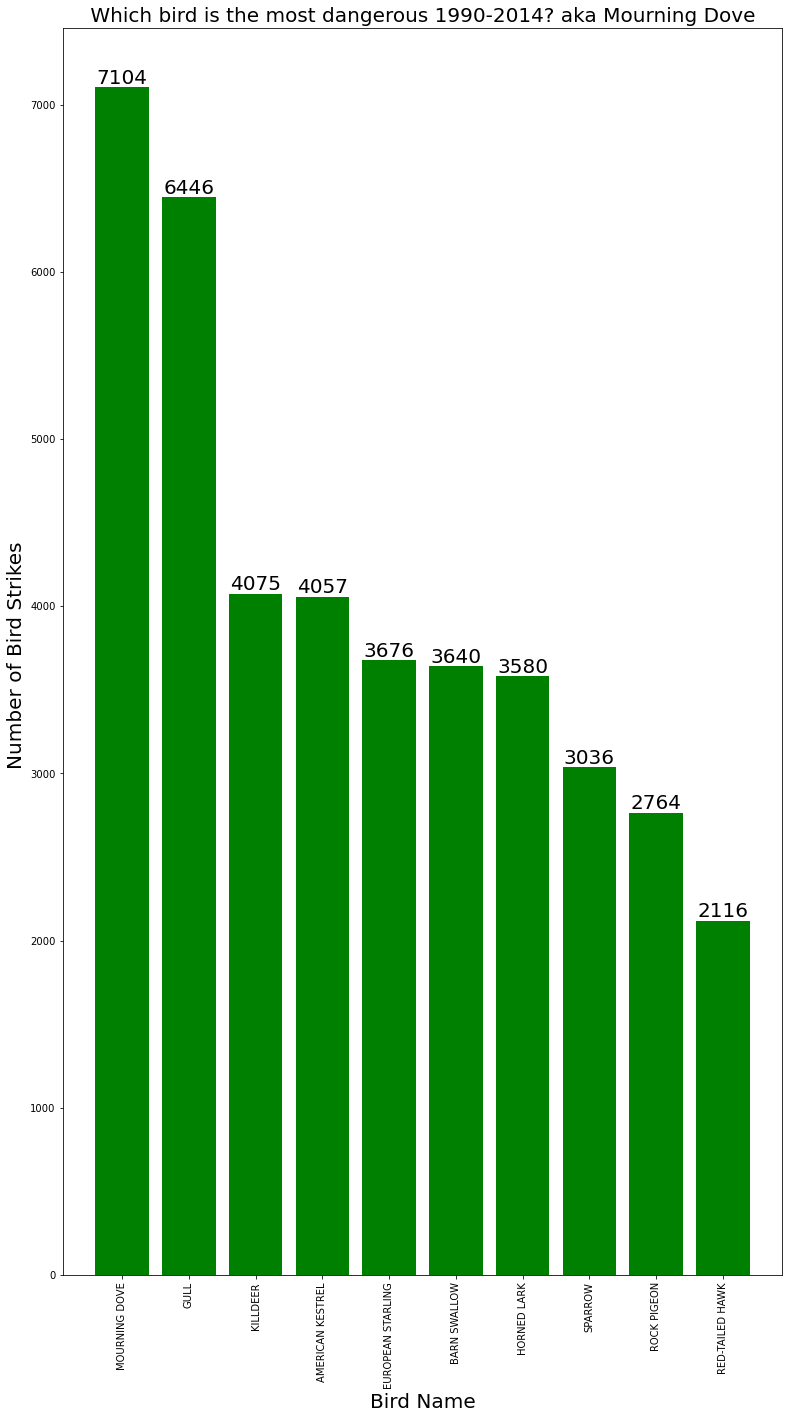

In [4]:
#removing "unknown" bird species, removing partial year data for 2015
birdType_df = subset_df[["Species Name","Species ID","Species Quantity"]].loc[(subset_df["Species Name"]!= "UNKNOWN MEDIUM BIRD") & (subset_df["Species Name"]!= "UNKNOWN SMALL BIRD") 
                                                                              & (subset_df["Species Name"]!= "UNKNOWN LARGE BIRD") & (subset_df["Species Name"]!= "UNKNOWN BIRD")
                                                                              & (subset_df["Incident Year"]!= 2015)]


# todo add labels, pretty up.  add thoughts on results
birdCounts = birdType_df["Species Name"].value_counts()

y_axis = birdCounts[:10]  
x_axis = birdCounts.index[:10]

# plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color = "green")
plt.tight_layout()  
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,birdCounts.index[:10], rotation="vertical")

plt.xlabel('Bird Name', fontsize = 20) # Label the x axis 
plt.ylabel("Number of Bird Strikes ", fontsize = 20)  # Label the y axis
plt.title(" Which bird is the most dangerous 1990-2014? aka Mourning Dove ", fontsize = 20)

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom', fontsize = 20)


figure = plt.gcf()

figure.set_size_inches(12, 20)

plt.savefig("Images/DangerousMourningDove.png", dpi=500) # TODO The legend and axis names are put in the saved image.

plt.show() 
 

# TODO Add Data Labels and name all axis - DONE 
# Write a observation summary for the graph. - DONE 

Mourning doves are the most common species of bird struck by aircrafts in USA. Followed closely by Gull. 

### Which month of the year has most animal strikes?



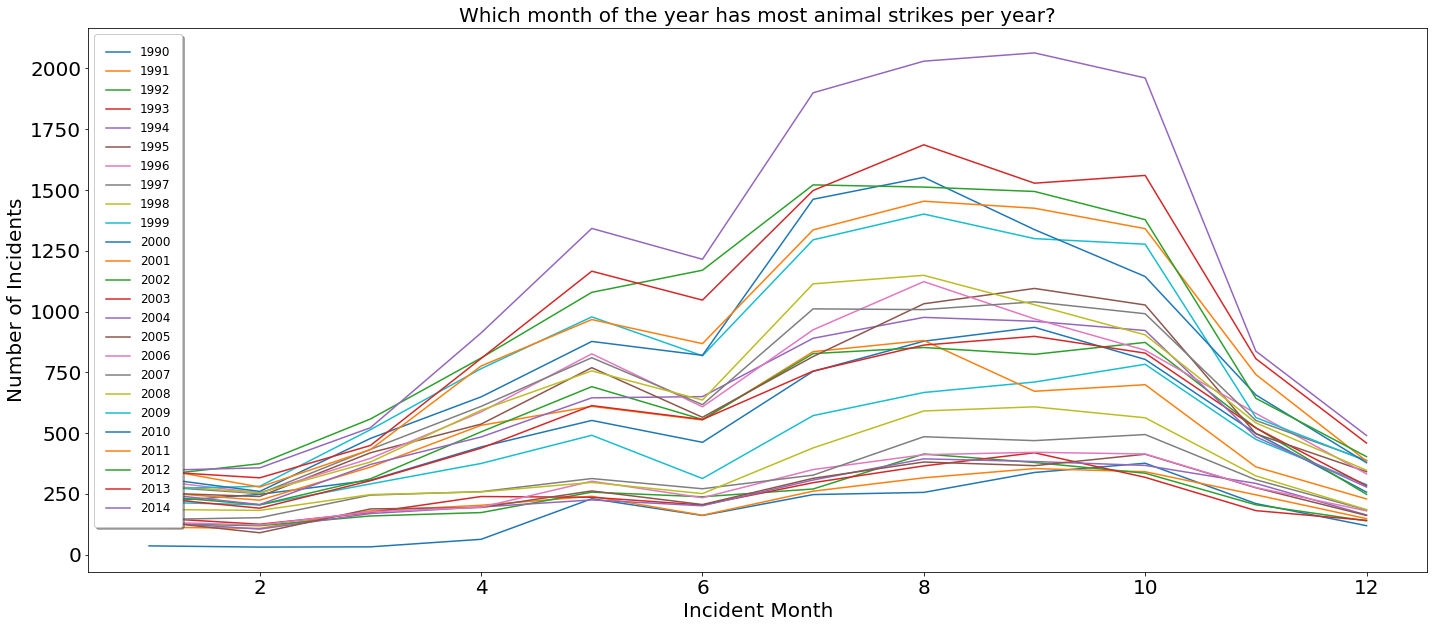

In [5]:
#### Which month of the year has most animal strikes?  - Jag 

#removing "unknown" bird species, removing partial year data for 2015
monthType_df = subset_df[["Incident Year","Incident Month","Species Quantity","Aircraft"]].loc[(subset_df["Incident Year"]!= 2015)]


# todo add labels, pretty up.  add thoughts on results

fig, ax = plt.subplots(figsize=(24,10))
ax.set_xlabel('Months (1-12)', fontsize = 20)
ax.set_ylabel('Number of Incidents', fontsize = 20)
monthType_df.groupby(['Incident Month','Incident Year']).count()['Aircraft'].unstack().plot(ax=ax, fontsize = 20)
plt.title("Which month of the year has most animal strikes per year?", fontsize = 20)
plt.savefig("Images/AugustReallySucks.png", dpi=500) # TODO The legend and axis names are put in the saved image.
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize = 12)
plt.show()

Majority of bird strikes occur from July to October which is when young birds recently have fledged from nests and fall migration occurs. August is by far the most dangerous month.

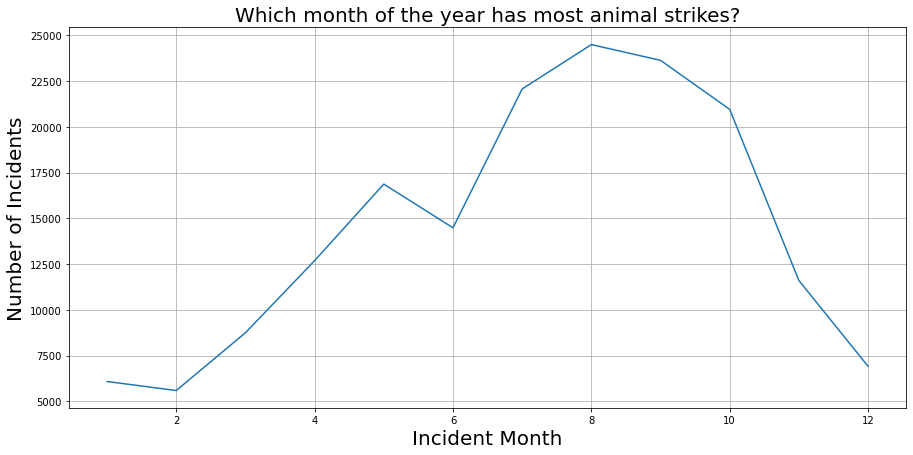

In [6]:
#jag
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('Months (1-12)', fontsize = 20)
ax.set_ylabel('Number of Incidents', fontsize = 20)
plt.title("Which month of the year has most animal strikes?", fontsize = 20)
df.groupby(['Incident Month']).count()['Aircraft'].plot(ax=ax)
plt.grid()
plt.show()

## Hypothesis Testing

The null hypothesis  is that no relationship exists on the categorical variables in the population; they are independent. 

In [7]:
grouped_month = monthType_df.groupby(['Incident Month']).count()
grouped_month_count = grouped_month['Incident Year'].to_frame().reset_index().rename(columns={"Incident Year":"Count"})
grouped_month_count['Expected']=len(monthType_df['Incident Year'])/12

stats.chisquare(grouped_month_count['Count'], grouped_month_count['Expected'])

Power_divergenceResult(statistic=34607.52016394642, pvalue=0.0)

In [8]:
bins = [0, 3, 6, 9, 12]
bin_labels = ['Winter', 'Spring', 'Summer', 'Fall']
binned_df=pd.cut(monthType_df["Incident Month"], bins, labels=bin_labels)
binned_df
monthType_df['Season']=binned_df
monthType_df['Counter']=1

# Winter_df = monthType_df[["Season","Counter"]].loc[(monthType_df["Season"] == "Winter")]
# Spring_df = monthType_df[["Season","Counter"]].loc[(monthType_df["Season"] == "Spring")]
# Summer_df = monthType_df[["Season","Counter"]].loc[(monthType_df["Season"] == "Summer")]
# Fall_df = monthType_df[["Season","Counter"]].loc[(monthType_df["Season"] == "Fall")]
monthType_df
grouped_season = monthType_df.groupby(['Season']).count().reset_index()

grouped_season['Expected']=len(monthType_df['Counter'])/4
grouped_season

,Season,Incident Year,Incident Month,Species Quantity,Aircraft,Counter,Expected
0,Winter,18957,18957,18496,18957,18957,40989.0
1,Spring,40520,40520,39450,40520,40520,40989.0
2,Summer,65014,65014,63197,65014,65014,40989.0
3,Fall,39465,39465,38500,39465,39465,40989.0


In [9]:
#Chi Square test
stats.chisquare(grouped_season['Counter'], grouped_season['Expected'])

Power_divergenceResult(statistic=25986.293542169853, pvalue=0.0)

In [10]:
Spring_Fall=grouped_season.loc[(grouped_season['Season']=='Spring') | (grouped_season['Season']=='Fall')]
stats.chisquare(Spring_Fall['Counter'], Spring_Fall['Expected'])

Power_divergenceResult(statistic=62.02973968625729, pvalue=3.383092392201315e-15)

Null Hypothesis: All months have the same number of strikes; All seasons have the same number of strikes
The Chi Square tests showed that there was a statistically significant difference between the number of animal strikes per month (p=0.0)
The Chi Square tests showed that there was a statistically significant difference between the number of animal strikes per season (p=0.0)

Based on the p=0.0 , the hypothesis cannot be rejected. 

## Which airport or geographic area is more likely to crash?




In [11]:
#Molly
state_df = subset_df.groupby(['State'], as_index='True')
state_grouping_count = pd.DataFrame(state_df['Incident Year'].count())
state_grouping_count = state_grouping_count.sort_values('Incident Year', ascending = False)
state_grouping_count

,Incident Year
State,
TX,14854
CA,13187
FL,10604
NY,9043
IL,7465
...,...
AB,47
MB,14
NL,7


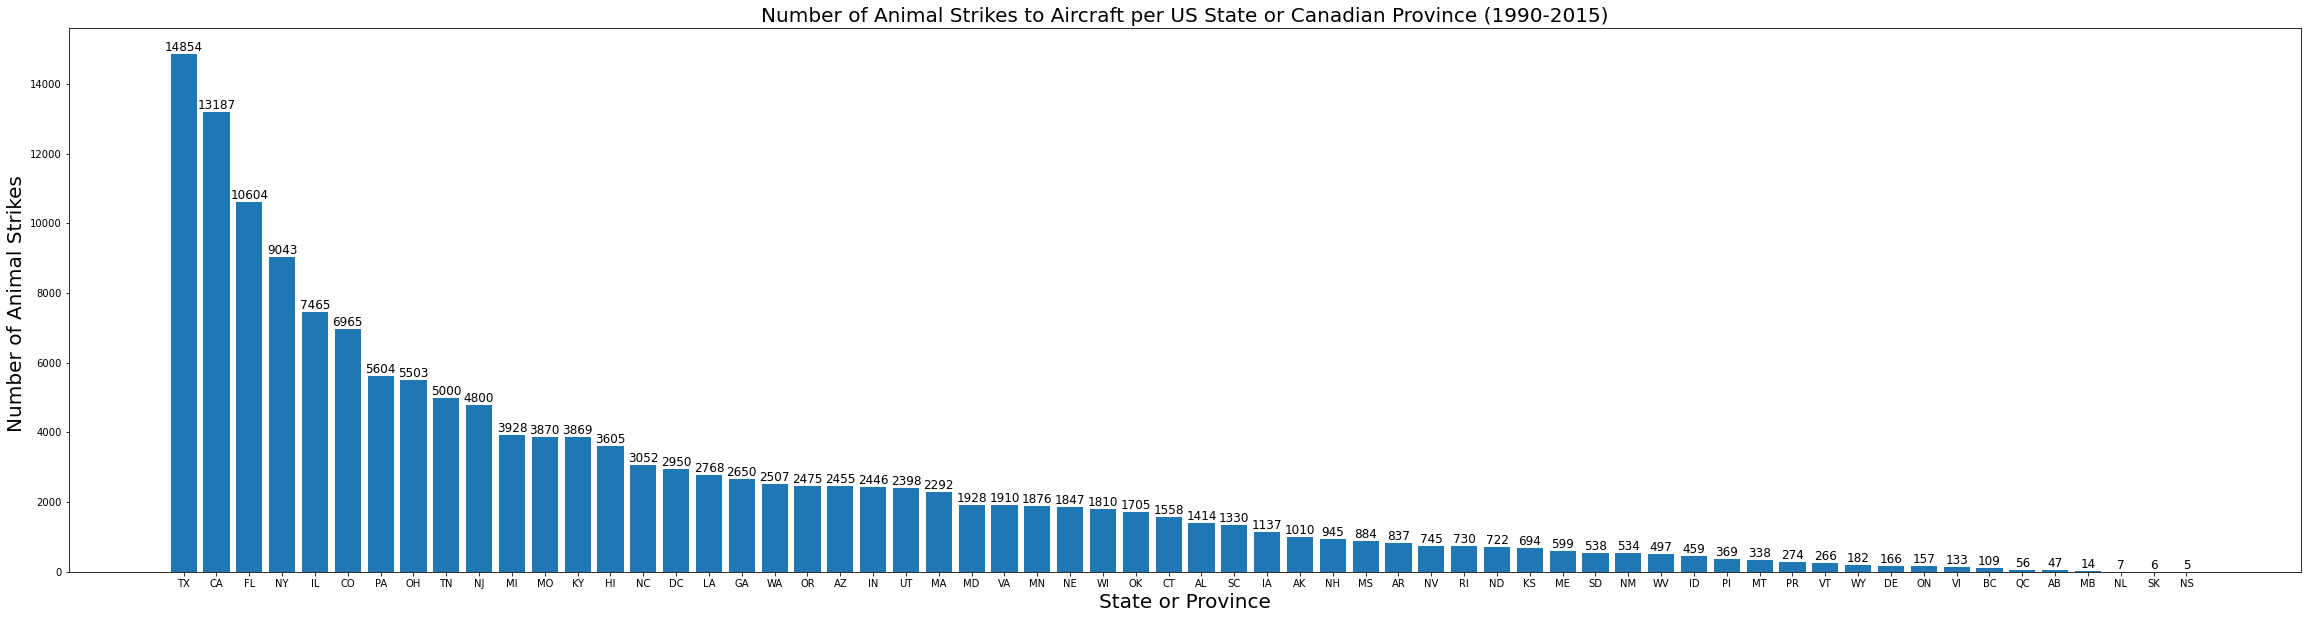

In [12]:
x_axis = state_grouping_count.index
y_axis = state_grouping_count['Incident Year']

plt.figure(figsize=(40,10))
plt.bar(x_axis, y_axis)
plt.xlabel('State or Province', fontsize = 20) # Label the x axis 
plt.ylabel("Number of Animal Strikes ", fontsize = 20)  # Label the y axis
plt.title("Number of Animal Strikes to Aircraft per US State or Canadian Province (1990-2015)", fontsize = 20)

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom', fontsize = 12)
    
plt.savefig("Images/StrikesPerStateNA.png", dpi=1000) 

plt.show()



Which state or province led to the most animal strikes by aircraft between 1990 and 2015?
Texas, California, and Florida were the three states that reported the most animal strikes reporting over 10,000 strikes each.
Nova Scotia, Saskatchewan, and Newfoundland and Labaroador were the three providences that reported the fewest animal strikes with fewer than ten strikes each.

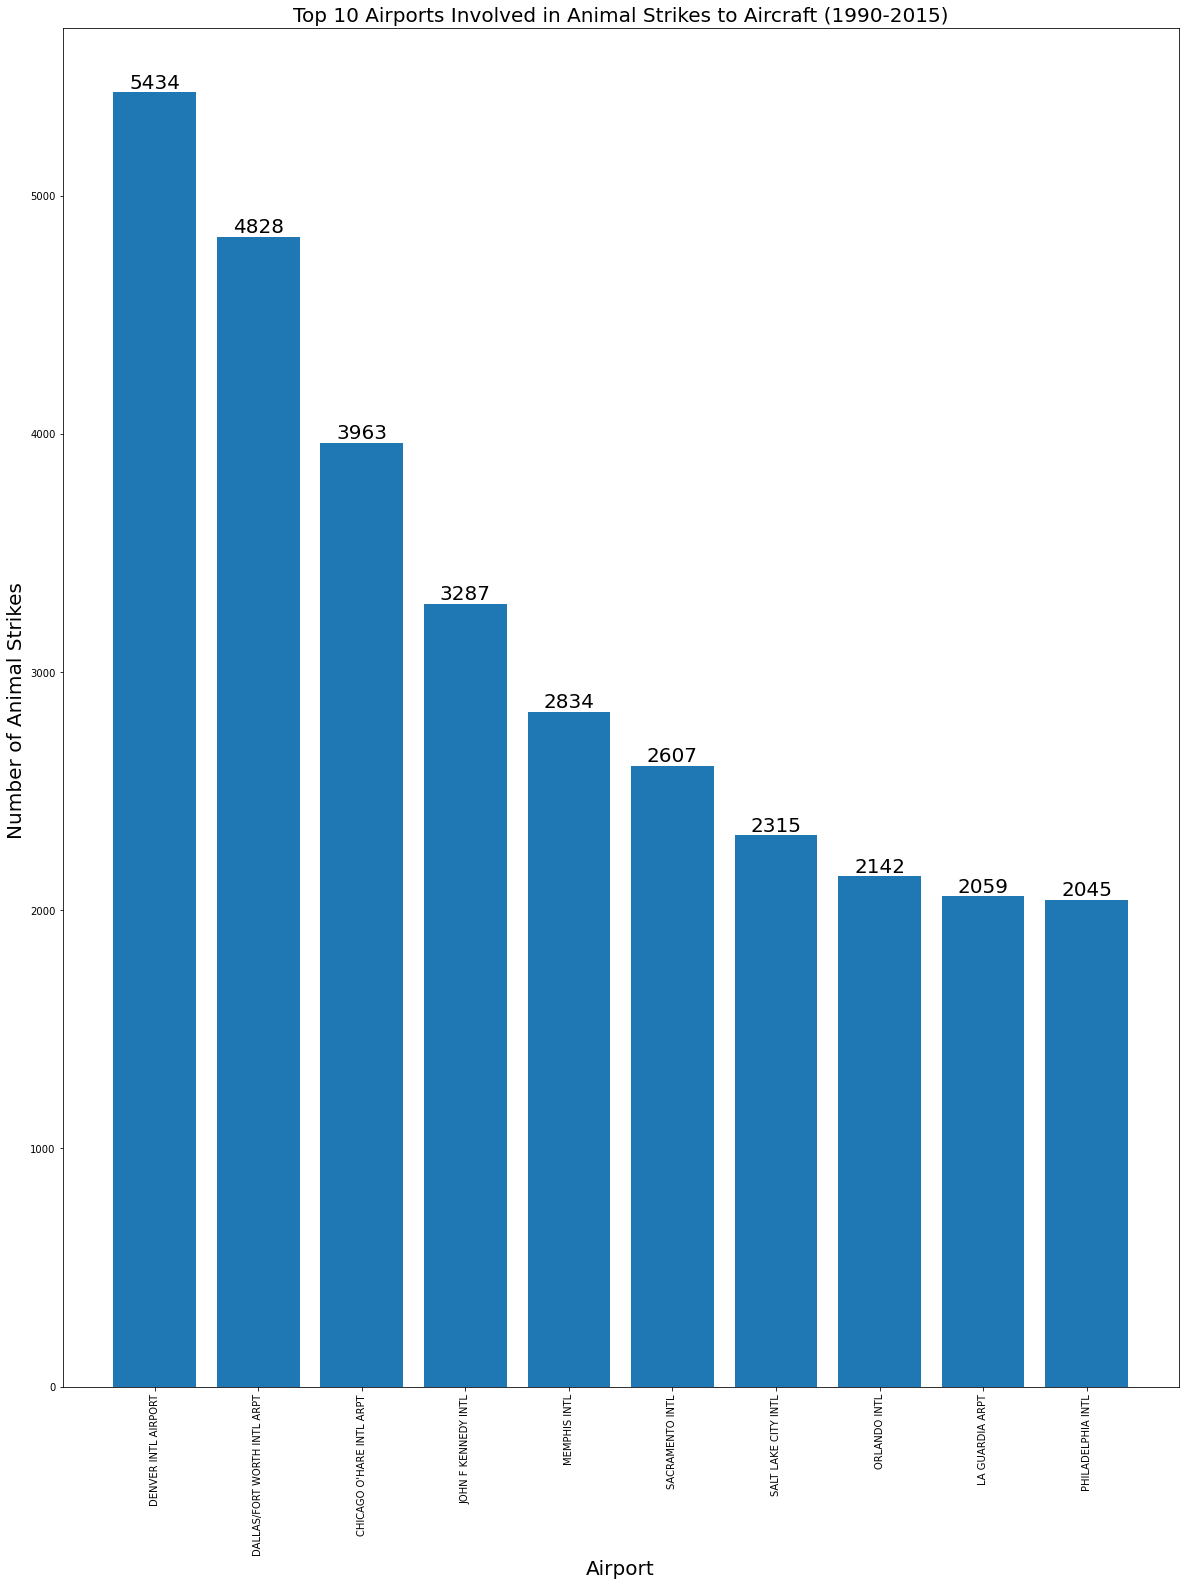

In [13]:
airport_df = subset_df.loc[subset_df['Airport'] != 'UNKNOWN', :]
airport_grouping_count = airport_df.groupby(['Airport']).count().sort_values('Incident Year', ascending = False)
airport_grouping_count.head()

x_axis = airport_grouping_count.index[:10]
y_axis = airport_grouping_count['Incident Year'][:10]

plt.figure(figsize=(20,25))
plt.bar(x_axis, y_axis)
plt.xlabel('Airport', fontsize = 20) # Label the x axis 
plt.ylabel("Number of Animal Strikes ", fontsize = 20)  # Label the y axis
plt.title("Top 10 Airports Involved in Animal Strikes to Aircraft (1990-2015)", fontsize = 20)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_axis, rotation="vertical")

for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom', fontsize = 20)
    
plt.savefig("Images/Top10AirportsNA.png", dpi=500) 
plt.show()


Which airports reported the most animal strikes between 1990 and 2015?
The top ten airports involved in animal strikes during these 25 years were Denver International, Dallas/Fort Worth
International, O'Hare, JFK, Memphis International, Sacremento International, Salt Lake City International, Orlando International, La Guardia, and Philedelphia International reporting between 2045-5434 airstrikes per airport.